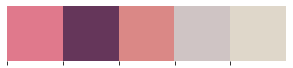

In [87]:
import json
import os
import glob
import pandas as pd
from pandas.io.json import json_normalize
import cv2
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set Color Palettes for the notebook
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

_______________________________________

In [37]:
base_path = "./ISIC-Archive/Data/"

In [38]:
def my_read_json(file):
    with open(file, encoding='utf-8', mode='r') as f:
        df = pd.json_normalize(json.load(f))
        return df

In [39]:
json_files = ['ISIC_0000001', 'ISIC_0000002', 'ISIC_0000003']
df_list = []

for file in json_files:
    df_list.append(pd.DataFrame.from_records(my_read_json(os.path.join(base_path, 'Descriptions', file))))

df1 = pd.concat(df_list, ignore_index=True)
df1

,_id,_modelType,created,name,updated,creator._id,creator.name,dataset._accessLevel,dataset._id,dataset.description,...,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.melanocytic,meta.clinical.sex,notes.reviewed.accepted,notes.reviewed.time,notes.reviewed.userId,notes.tags
0,5436e3acbae478396759f0d1,image,2014-10-09T19:36:12.070000+00:00,ISIC_0000001,2015-02-23T02:48:27.455000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,...,anterior torso,benign,nevus,None,True,female,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[Challenge 2018: Task 1-2: Training, Challenge..."
1,5436e3acbae478396759f0d3,image,2014-10-09T19:36:12.152000+00:00,ISIC_0000002,2015-02-23T02:48:37.249000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,...,upper extremity,malignant,melanoma,histopathology,True,female,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[Challenge 2019: Training, Challenge 2016: Tra..."
2,5436e3acbae478396759f0d5,image,2014-10-09T19:36:12.233000+00:00,ISIC_0000003,2015-02-23T02:48:46.021000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,...,upper extremity,benign,nevus,None,True,male,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[Challenge 2018: Task 1-2: Training, Challenge..."


In [40]:
# df.columns.get_loc("meta.clinical.anatom_site_general")
# cols = [i for i in df.columns.tolist() if '_id' in i or 'meta' in i]

In [41]:
includeCols = ['meta', '_id', 'name']
excludeCols = ['creator._id', 'creator.name', 'dataset._id', 'dataset.name']

def selCols(df, inCols, exCols):
    df = df[df.columns[df.columns.str.contains('|'.join(inCols))]]
    df = df.drop(exCols, axis=1)
    df = df.rename(columns=lambda x: x.rpartition(".")[2])
    return df

df2 = selCols(df1, includeCols, excludeCols)
df2.head()
# df2.columns.tolist()

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,sex
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30,anterior torso,benign,nevus,None,True,female
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60,upper extremity,malignant,melanoma,histopathology,True,female
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30,upper extremity,benign,nevus,None,True,male


## Load all images metadata to pandas dataframe and select columns

In [45]:
path_ = os.path.join(base_path, 'Descriptions')
for filename in os.listdir(path_):
    df_list.append(pd.DataFrame.from_records(my_read_json(os.path.join(path_,filename))))
df = pd.concat(df_list, ignore_index=True)
df = selCols(df, includeCols, excludeCols)
df.head()

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,...,clin_size_long_diam_mm,family_hx_mm,personal_hx_mm,dermoscopic_type,nevus_type,mel_class,mel_thick_mm,lesion_id,patient_id,mel_type
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30,anterior torso,benign,nevus,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30,upper extremity,benign,nevus,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30,upper extremity,benign,nevus,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.columns.tolist()

['_id',
 'name',
 'image_type',
 'pixelsX',
 'pixelsY',
 'age_approx',
 'anatom_site_general',
 'benign_malignant',
 'diagnosis',
 'diagnosis_confirm_type',
 'melanocytic',
 'sex',
 'clin_size_long_diam_mm',
 'family_hx_mm',
 'personal_hx_mm',
 'dermoscopic_type',
 'nevus_type',
 'mel_class',
 'mel_thick_mm',
 'lesion_id',
 'patient_id',
 'mel_type']

## Save CSV

In [47]:
csv_path = os.path.join(base_path, "metadata.csv")

In [48]:
 # r'C:\Users\Ron\Desktop\export_dataframe.csv'
    df.to_csv(csv_path, index = False, header=True)

## Read CSV

In [49]:
df_target = pd.read_csv(csv_path)

/home/mestecha/anaconda3/envs/sagan/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (13,14,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
len(df_target.index)

69448

In [56]:
df_target['name'].nunique()

69445

In [57]:
df_target.head(20)

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,...,clin_size_long_diam_mm,family_hx_mm,personal_hx_mm,dermoscopic_type,nevus_type,mel_class,mel_thick_mm,lesion_id,patient_id,mel_type
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5436e3acbae478396759f0d9,ISIC_0000005,dermoscopic,1022,767,40.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5436e3acbae478396759f0df,ISIC_0000008,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5436e3abbae478396759f0cf,ISIC_0000000,dermoscopic,1022,767,55.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5436e3acbae478396759f0dd,ISIC_0000007,dermoscopic,1022,767,25.0,posterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5436e3acbae478396759f0e1,ISIC_0000009,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
ids = df_target["_id"]
# df_target[ids.isin(ids[ids.duplicated()])].sort_index().head(20)
df_target[ids.isin(ids[ids.duplicated()])].sort_values('name').head(20)

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,...,clin_size_long_diam_mm,family_hx_mm,personal_hx_mm,dermoscopic_type,nevus_type,mel_class,mel_thick_mm,lesion_id,patient_id,mel_type
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_nodups=df_target.copy()
# df_nodups.sort_values("name", inplace = True)
df_nodups.sort_index()
df_nodups.drop_duplicates(subset ="name", keep ='first', inplace = True)
df_nodups.head(20)

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,...,clin_size_long_diam_mm,family_hx_mm,personal_hx_mm,dermoscopic_type,nevus_type,mel_class,mel_thick_mm,lesion_id,patient_id,mel_type
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5436e3acbae478396759f0d9,ISIC_0000005,dermoscopic,1022,767,40.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5436e3acbae478396759f0df,ISIC_0000008,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5436e3abbae478396759f0cf,ISIC_0000000,dermoscopic,1022,767,55.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5436e3acbae478396759f0dd,ISIC_0000007,dermoscopic,1022,767,25.0,posterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5436e3acbae478396759f0e1,ISIC_0000009,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5436e3acbae478396759f0db,ISIC_0000006,dermoscopic,1022,767,25.0,posterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,5436e3acbae478396759f0d7,ISIC_0000004,dermoscopic,1022,767,80.0,posterior torso,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
len(df_nodups.index) # == df_target['name'].nunique()

69445

## Total missing values

In [61]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [62]:
missing_values_table(df_nodups)

Your selected dataframe has 22 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
mel_thick_mm,69408,99.9
mel_type,69405,99.9
mel_class,69191,99.6
nevus_type,68750,99.0
family_hx_mm,67932,97.8
personal_hx_mm,67911,97.8
clin_size_long_diam_mm,67909,97.8
dermoscopic_type,62954,90.7
lesion_id,44768,64.5
patient_id,44768,64.5


In [17]:
# missing_values_table(df_target)

# Malignant melanomas

In [18]:
# df_mal = pd.DataFrame(df_target.benign_malignant.value_counts())
# df_mal['name'] = df_mal.index
# alt.Chart(df_mal).mark_bar().encode(
#     x='name',
#     y='benign_malignant',
#     tooltip=["name","benign_malignant"]
# ).interactive()

In [19]:
df_mal = pd.DataFrame(df_nodups.benign_malignant.value_counts())
df_mal['name'] = df_mal.index
alt.Chart(df_mal).mark_bar().encode(
    x='name',
    y='benign_malignant',
    tooltip=["name","benign_malignant"]
).interactive()

alt.Chart(...)

In [20]:
# # df_ = df[df['benign_malignant'].notna()]
# df_m = df_target.loc[df_target['benign_malignant'] == 'malignant']
# df_m.benign_malignant.value_counts().unique

In [21]:
# df_ = df[df['benign_malignant'].notna()]
df_m = df_nodups.loc[df_target['benign_malignant'] == 'malignant']
df_m.benign_malignant.value_counts().unique

<bound method Series.unique of malignant    5714
Name: benign_malignant, dtype: int64>

In [22]:
#  df_target[df_target['benign_malignant']=='malignant']['name'].index.values

In [154]:
# vals = df_target[df_target['benign_malignant']=='malignant']['name'].index.values
# fig=plt.figure(figsize=(15, 10))
# columns = 4; rows = 5
# for i in range(1, columns*rows +1):
#     # added the grid lines for pixel purposes
    
#     image = cv2.imread(base_path + '/Images/' + df_target[df_target['benign_malignant']=='malignant']['name'][vals[i]] + '.jpeg')
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(ds, cmap=plt.cm.bone)
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=plt.cm.bone) 
#     fig.add_subplot

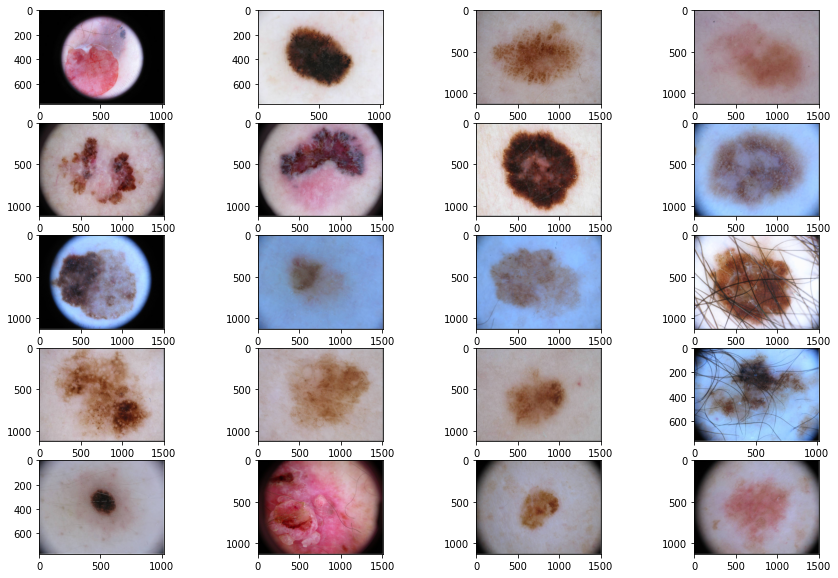

In [155]:
vals = df_nodups[df_nodups['benign_malignant']=='malignant']['name'].index.values
fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    # added the grid lines for pixel purposes
    
    image = cv2.imread(base_path + '/Images/' + df_target[df_target['benign_malignant']=='malignant']['name'][vals[i]] + '.jpeg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds, cmap=plt.cm.bone)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=plt.cm.bone) 
    fig.add_subplot

In [156]:
# images_names = df_target['name'].tolist()
# image_name = images_names[55:56]

# image = cv2.imread(base_path + '/Images/' + image_name[0] + '.jpeg')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('Original : '+ image_name[0])

## Parts of the body

In [157]:
# # df_anatom = pd.DataFrame(df_target.anatom_site_general.value_counts())
# df_anatom = pd.DataFrame(df_target.loc[df_target['benign_malignant'] == 'malignant'].anatom_site_general.value_counts())
# df_anatom['name'] = df_anatom.index
# alt.Chart(df_anatom).mark_bar().encode(
#     x='name',
#     y='anatom_site_general',
#     tooltip=["name","anatom_site_general"]
# ).interactive()

In [23]:
# df_anatom = pd.DataFrame(df_target.anatom_site_general.value_counts())
df_anatom = pd.DataFrame(df_nodups.loc[df_target['benign_malignant'] == 'malignant'].anatom_site_general.value_counts())
df_anatom['name'] = df_anatom.index
alt.Chart(df_anatom).mark_bar().encode(
    x='name',
    y='anatom_site_general',
    tooltip=["name","anatom_site_general"]
).interactive()

alt.Chart(...)

## Age

In [24]:
# df_age = pd.DataFrame(df_target.loc[df_target['benign_malignant'] == 'malignant'].age_approx.value_counts())
# df_age['name'] = df_age.index
# alt.Chart(df_age).mark_bar().encode(
#     x='name',
#     y='age_approx',
#     tooltip=["name","age_approx"]
# ).interactive()

In [25]:
df_age = pd.DataFrame(df_nodups.loc[df_target['benign_malignant'] == 'malignant'].age_approx.value_counts())
df_age['name'] = df_age.index
alt.Chart(df_age).mark_bar().encode(
    x='name',
    y='age_approx',
    tooltip=["name","age_approx"]
).interactive()

alt.Chart(...)

# Image preprocessing

[]

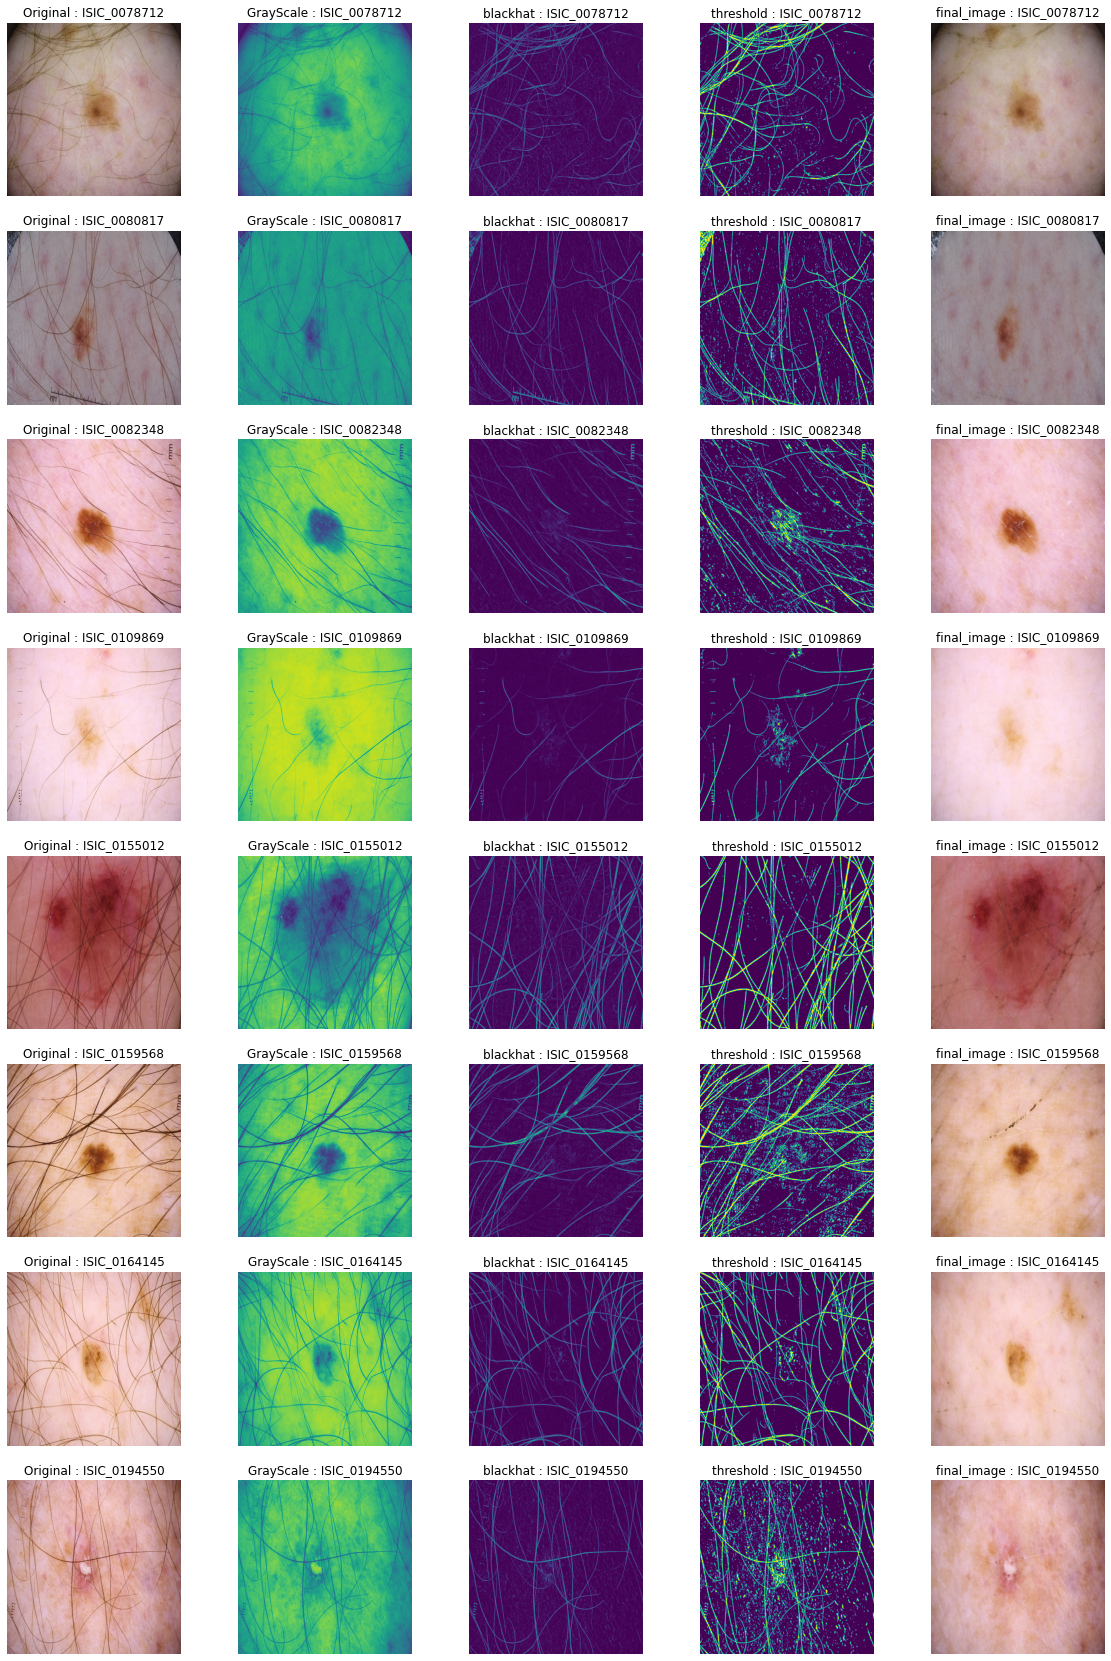

In [161]:
hair_images =['ISIC_0078712','ISIC_0080817','ISIC_0082348','ISIC_0109869','ISIC_0155012','ISIC_0159568','ISIC_0164145','ISIC_0194550','ISIC_0194914','ISIC_0202023']

l = len(hair_images[:8])

fig = plt.figure(figsize=(20,30))

for i,image_name in enumerate(hair_images[:8]):
    
    
    image = cv2.imread(base_path + '/Images/' + image_name + '.jpeg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    # Convert the original image to grayscale
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    plt.subplot(l, 5, (i*5)+2)
    plt.imshow(grayScale)
    plt.axis('off')
    plt.title('GrayScale : '+ image_name)
    
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(l, 5, (i*5)+3)
    plt.imshow(blackhat)
    plt.axis('off')
    plt.title('blackhat : '+ image_name)
    
    # intensify the hair countours in preparation for the inpainting 
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    plt.subplot(l, 5, (i*5)+4)
    plt.imshow(threshold)
    plt.axis('off')
    plt.title('threshold : '+ image_name)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    plt.subplot(l, 5, (i*5)+5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('final_image : '+ image_name)
       
plt.plot()

In [26]:
# Function for hair removing
def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    
    return final_image

## Create dataframe from segment file names for correlate with malignant melanomas

In [63]:
import re

In [64]:
segment_path = os.path.join(base_path, 'segmentations')

In [65]:
data = []
# for folder in sorted(os.listdir(segment_path)):
for filename in sorted(os.listdir(segment_path)):
    name = re.sub(r'_[a-zA-Z]+.png', '', filename)
    val = re.search(r'_[a-zA-Z]+', filename).group().replace('_',"")
    data.append((name, val, filename))

df_segments = pd.DataFrame(data, columns=['name', 'type', 'file'])

In [66]:
df_segments

,name,type,file
0,ISIC_0000000,expert,ISIC_0000000_expert.png
1,ISIC_0000001,expert,ISIC_0000001_expert.png
2,ISIC_0000002,expert,ISIC_0000002_expert.png
3,ISIC_0000003,expert,ISIC_0000003_expert.png
4,ISIC_0000004,novice,ISIC_0000004_novice.png
...,...,...,...
13774,ISIC_0016068,expert,ISIC_0016068_expert.png
13775,ISIC_0016069,expert,ISIC_0016069_expert.png
13776,ISIC_0016070,expert,ISIC_0016070_expert.png
13777,ISIC_0016071,expert,ISIC_0016071_expert.png


In [67]:
df_nodups

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,...,clin_size_long_diam_mm,family_hx_mm,personal_hx_mm,dermoscopic_type,nevus_type,mel_class,mel_thick_mm,lesion_id,patient_id,mel_type
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5436e3acbae478396759f0d9,ISIC_0000005,dermoscopic,1022,767,40.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5436e3acbae478396759f0df,ISIC_0000008,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69443,5e8106c274440928c0be1936,ISIC_9999134,NaN,2592,1936,50.0,posterior torso,benign,NaN,single image expert consensus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL_2076932,IP_6526534,NaN
69444,5e84f4233ce31df0f16006a6,ISIC_9999320,NaN,6000,4000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69445,5e95f250396583e25a5072b7,ISIC_9999515,NaN,1872,1053,20.0,lower extremity,benign,NaN,serial imaging showing no change,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL_6364820,IP_2026598,NaN
69446,5e95f1fc396583e25a506be6,ISIC_9999666,NaN,1872,1053,50.0,lower extremity,benign,NaN,serial imaging showing no change,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL_6048457,IP_7702038,NaN


In [70]:
df_mal = pd.DataFrame(df_nodups.benign_malignant.value_counts())
df_mal['name'] = df_mal.index
alt.Chart(df_mal).mark_bar().encode(
    x='name',
    y='benign_malignant',
    tooltip=["name","benign_malignant"]
).interactive()

alt.Chart(...)

In [68]:
# m = df_segments.name.isin(df_nodups.name)
key_names = df_segments["name"]
df_final = df_nodups[df_nodups["name"].isin(key_names)].sort_values('name')

In [69]:
df_final

,_id,name,image_type,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,...,clin_size_long_diam_mm,family_hx_mm,personal_hx_mm,dermoscopic_type,nevus_type,mel_class,mel_thick_mm,lesion_id,patient_id,mel_type
7,5436e3abbae478396759f0cf,ISIC_0000000,dermoscopic,1022,767,55.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,5436e3acbae478396759f0d7,ISIC_0000004,dermoscopic,1022,767,80.0,posterior torso,malignant,melanoma,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13785,589de241d83113657d7b1831,ISIC_0016068,dermoscopic,4288,2848,70.0,NaN,benign,nevus,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13786,589de241d83113657d7b183a,ISIC_0016069,dermoscopic,4288,2848,30.0,NaN,benign,nevus,histopathology,...,NaN,NaN,NaN,NaN,nevus NOS,NaN,NaN,NaN,NaN,NaN
13787,589de242d83113657d7b1848,ISIC_0016070,dermoscopic,4288,2848,65.0,NaN,benign,nevus,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13788,589de243d83113657d7b1852,ISIC_0016071,dermoscopic,4288,2848,60.0,NaN,benign,nevus,histopathology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_mal = pd.DataFrame(df_final.benign_malignant.value_counts())
df_mal['name'] = df_mal.index
alt.Chart(df_mal).mark_bar().encode(
    x='name',
    y='benign_malignant',
    tooltip=["name","benign_malignant"]
).interactive()

alt.Chart(...)

In [231]:
# df_ = df[df['benign_malignant'].notna()]
df_m = df_final.loc[df_final['benign_malignant'] == 'malignant']
df_m.benign_malignant.value_counts().unique

<bound method Series.unique of malignant    1084
Name: benign_malignant, dtype: int64>

In [228]:
df_nodups.columns

Index(['_id', 'name', 'image_type', 'pixelsX', 'pixelsY', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'diagnosis',
       'diagnosis_confirm_type', 'melanocytic', 'sex',
       'clin_size_long_diam_mm', 'family_hx_mm', 'personal_hx_mm',
       'dermoscopic_type', 'nevus_type', 'mel_class', 'mel_thick_mm',
       'lesion_id', 'patient_id', 'mel_type'],
      dtype='object')

In [232]:
mis_val = df_mal.isnull().sum()

In [92]:
includeCols = ['_id', 'name', 'pixelsX', 'pixelsY','benign_malignant', 'diagnosis', 'sex', 'age_approx', 'anatom_site_general']
excludeCols = ['lesion_id', 'patient_id']

def selCols(df, inCols, exCols):
    df = df[df.columns[df.columns.str.contains('|'.join(inCols))]]
    df = df.drop(exCols, axis=1)
    df = df.rename(columns=lambda x: x.rpartition(".")[2])
    return df

df2class = selCols(df_nodups, includeCols, excludeCols)
df2class.rename(columns = {'_id':'id', 'name':'image_name', 'age_approx':'age', 'anatom_site_general':'anatomy'}, inplace = True)
# pd.Series(np.where(df2class.benign_malignant.values == 'malignant', 1, 0),
#           sample.index)
df2class.head(20)

,id,image_name,pixelsX,pixelsY,age,anatomy,benign_malignant,diagnosis,diagnosis_confirm_type,sex
0,5436e3acbae478396759f0d1,ISIC_0000001,1022,767,30.0,anterior torso,benign,nevus,NaN,female
1,5436e3acbae478396759f0d3,ISIC_0000002,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,female
2,5436e3acbae478396759f0d5,ISIC_0000003,1022,767,30.0,upper extremity,benign,nevus,NaN,male
5,5436e3acbae478396759f0d9,ISIC_0000005,1022,767,40.0,anterior torso,benign,nevus,NaN,female
6,5436e3acbae478396759f0df,ISIC_0000008,1022,767,30.0,anterior torso,benign,nevus,NaN,female
7,5436e3abbae478396759f0cf,ISIC_0000000,1022,767,55.0,anterior torso,benign,nevus,NaN,female
8,5436e3acbae478396759f0dd,ISIC_0000007,1022,767,25.0,posterior torso,benign,nevus,NaN,female
9,5436e3acbae478396759f0e1,ISIC_0000009,1022,767,30.0,anterior torso,benign,nevus,NaN,female
10,5436e3acbae478396759f0db,ISIC_0000006,1022,767,25.0,posterior torso,benign,nevus,NaN,female
11,5436e3acbae478396759f0d7,ISIC_0000004,1022,767,80.0,posterior torso,malignant,melanoma,histopathology,male


Out of 65 NAN values, 339 are benign and 0 malignant.


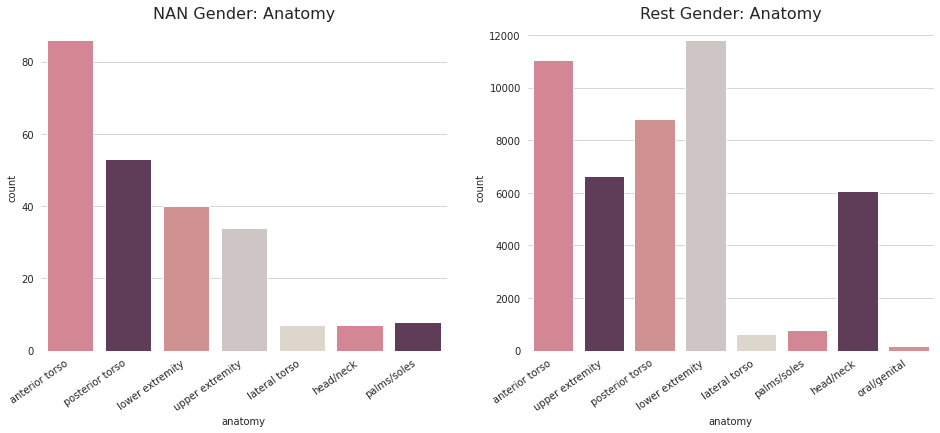

In [91]:
# Data
nan_sex = df2class[df2class['sex'].isna() == True]
is_sex = df2class[df2class['sex'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(nan_sex['anatomy'], ax = ax1, palette=colors_nude)
b = sns.countplot(is_sex['anatomy'], ax = ax2, palette=colors_nude)
ax1.set_title('NAN Gender: Anatomy', fontsize=16)
ax2.set_title('Rest Gender: Anatomy', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
print('Out of 65 NAN values, {} are benign and 0 malignant.'.format(nan_sex['diagnosis'].value_counts()[0]))

## One Hot Encoding

In [79]:
# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# === TRAIN ===
to_encode = ['sex', 'anatomy', 'diagnosis']
encoded_all = []

label_encoder = LabelEncoder()

for column in to_encode:
    encoded = label_encoder.fit_transform(df2class[column])
    encoded_all.append(encoded)
    
df2class['sex'] = encoded_all[0]
df2class['anatomy'] = encoded_all[1]
df2class['diagnosis'] = encoded_all[2]

if 'benign_malignant' in train_df.columns : train_df.drop(['benign_malignant'], axis=1, inplace=True)

## Balance dataset

In [75]:
df2class

,_id,name,pixelsX,pixelsY,age_approx,anatom_site_general,benign_malignant,sex
0,5436e3acbae478396759f0d1,ISIC_0000001,1022,767,30.0,anterior torso,benign,female
1,5436e3acbae478396759f0d3,ISIC_0000002,1022,767,60.0,upper extremity,malignant,female
2,5436e3acbae478396759f0d5,ISIC_0000003,1022,767,30.0,upper extremity,benign,male
5,5436e3acbae478396759f0d9,ISIC_0000005,1022,767,40.0,anterior torso,benign,female
6,5436e3acbae478396759f0df,ISIC_0000008,1022,767,30.0,anterior torso,benign,female
...,...,...,...,...,...,...,...,...
69443,5e8106c274440928c0be1936,ISIC_9999134,2592,1936,50.0,posterior torso,benign,male
69444,5e84f4233ce31df0f16006a6,ISIC_9999320,6000,4000,NaN,NaN,NaN,NaN
69445,5e95f250396583e25a5072b7,ISIC_9999515,1872,1053,20.0,lower extremity,benign,male
69446,5e95f1fc396583e25a506be6,ISIC_9999666,1872,1053,50.0,lower extremity,benign,male
